# Looking at Switchiness

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

#### Reconstruct meta-PCNA signature

In [2]:
g = ['PCNA', 'CKS2', 'NUSAP1', 'RRM2', 'ZWINT', 
     'PRC1', 'TFDP1', 'CCNA2', 'CCNB1', 'MELK', 
     'TPX2', 'BIRC5', 'NCAPG2', 'RFWD3', 'TACC3', 
     'KIAA0101', 'MCM2', 'MCM5', 'ASF1B', 'CCNB2', 
     'GTPBP2', 'KIF20A', 'PTTG1', 'AURKA', 'CDC20', 
     'FOXM1', 'GINS2', 'MAD2L1', 'UBE2C', 'GINS1', 
     'MCM6', 'NCAPD2', 'NUP37', 'CKS1B', 'MCM7', 
     'ARID3A', 'AURKB', 'CDCA8', 'SNRPD1', 'TROAP', 
     'C21orf45', 'DDX39', 'ESPL1', 'HMBS', 'LSM6', 
     'MCM4', 'NCAPD3', 'PPIH', 'DTL', 'EPB42', 'HMGN2',
     'MCM3', 'PF4', 'PPBP', 'RFC4', 'TOP2A', 'BUB1B', 
     'CDT1', 'FEN1', 'GATA1', 'GYPB', 'HMGB2', 'KIF22', 
     'KLF1', 'MLF1IP', 'RFC3', 'RHCE', 'TAL1', 'TCF3', 
     'ALAS2', 'CDCA3', 'CENPA', 'CKLF', 'GTSE1', 
     'NFE2', 'OIP5', 'SHCBP1', 'SNF8', 'SNRPB', 'SPTA1', 
     'KEL', 'KIF2C', 'LYL1', 'PSMD9', 'RACGAP1', 'RPIA',
     'TIMELESS', 'TRMT5', 'TYMS', 'VRK1', 'FBXO7', 'H3F3A',
     'NUDT1', 'PLEK', 'POLE2', 'RHAG', 'WHSC1', 'APOBEC3B', 
     'BPGM', 'CHAF1A', 'DNAJC9', 'FBXO5', 'KIF4A', 'KLF15', 
     'MKI67', 'PGD', 'RPA3', 'SFRS2', 'TRIM58', 'ADAMTS13', 
     'CDCA4', 'CDKN3', 'FECH', 'LBR', 'LIG1', 'LMNB1', 'MICB', 
     'NUP210', 'ORC6L', 'RAD51AP1', 'RHD', 'SMC4', 'GYPA', 
     'RPP30', 'TRIM10']
meta_pcna = rna_df.ix[g].median()[:,'01']
meta_pcna.name = 'meta_pcna'
len(meta_pcna)

8556

In [3]:
meta_pcna_all = rna_df.ix[g].median()
meta_pcna_all.name = 'meta_pcna'
len(meta_pcna_all)

9907

In [4]:
m2 = meta_pcna_all.ix[matched_tn.columns]
(m2.unstack().T.diff().ix[1] < 0).value_counts()

True     598
False     51
dtype: int64

In [5]:
(m2.unstack().T.diff().ix[1] < 0).mean()

0.92141756548536213

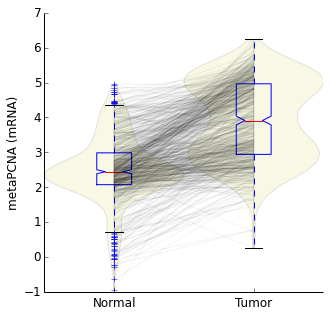

In [6]:
#Do not import
mm = meta_pcna_all.ix[matched_tn.columns]
fig, ax = subplots(figsize=(5,5))
violin_plot_series(mm, ax=ax, order=['11','01'], ann=None)

for i,v in mm.unstack().iterrows():
    ax.plot([0,1],[v['11'], v['01']], color='black', alpha=.05)
ax.set_ylabel('metaPCNA (mRNA)')
ax.set_xlabel('')
ax.set_xticklabels(['Normal','Tumor'])
prettify_ax(ax)
#fig.savefig(FIGDIR + 'tn_tumorness.png', dpi=300)

In [7]:
cols = list(rna_df.columns)
pts = rna_df.iloc[0].unstack()[['01','11']].dropna().index
matched_rna = rna_df[pts]

In [8]:
dx_rna = binomial_test_screen(matched_rna, fc=1.)
dx_rna = dx_rna[dx_rna.num_dx > 300]

Read in normalized data for pan-cancer comparisons

In [9]:
#STORE = store.filename

In [10]:
df_s = pd.read_hdf(STORE, 'robust_within_cancer')
df_s3 = pd.read_hdf(STORE, 'robust_within_cancer_matched')

In [11]:
standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
def switch_plot(g):
    '''
    Plot to look at the switchiness of an expression signal. 
    '''
    fig = plt.figure(figsize=(10, 6))
    ax1 = plt.subplot2grid((5, 3), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((5, 3), (0, 1), rowspan=3)
    ax3 = plt.subplot2grid((5, 3), (0, 2), rowspan=3)
    ax4 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
    
    ax=ax1
    series_scatter(meta_pcna_all[:,'01'], rna_df.ix[g].ix[ti(codes=='KIRC')][:,'01'],
                   color=colors[1], ax=ax, ann=None)
    series_scatter(meta_pcna_all[:,'11'], rna_df.ix[g].ix[ti(codes=='KIRC')][:,'11'],
                   color=colors[0], ax=ax, ann=None)

    ax=ax2
    v = rna_df.ix[g]
    v2 = pd.concat([standardize(v.ix[ti(codes==c)]) for c in codes.unique()])
    v2 = v2.clip(-5,5)
    series_scatter(meta_pcna_all[:,'01'], df_s3.ix[g][:,'01'].clip(-5,5),
                   color=colors[1], ax=ax, s=20, ann=None)
    series_scatter(meta_pcna_all[:,'11'], df_s3.ix[g][:,'11'].clip(-5,5),
                   color=colors[0], ax=ax, s=20, ann=None)
    
    ax=ax3
    v = rna_df.ix[g]
    v2 = pd.concat([standardize(v.ix[ti(codes==c)]) for c in codes.unique()])
    v2 = v2.clip(-5,5)
    corr = pearson_pandas(meta_pcna_all[:,'01'], df_s.ix[g].dropna())['rho']
    corr = 'r = {}'.format(round(corr, 2))
    series_scatter(meta_pcna_all[:,'01'], df_s.ix[g].clip(-5,5),
                   color=colors[1], ax=ax, s=20, ann=None)
    ax.annotate(corr, (.65, .05), xycoords='axes fraction', size=16)
    
    paired_bp_tn_split(rna_df.ix[g], codes, ax=ax4, data_type='exp.')
    
    for ax in [ax1, ax2, ax3]:
        prettify_ax(ax)
        ax.set_xbound(meta_pcna_all.min(), meta_pcna_all.max())
    fig.tight_layout()

#### Generate gene-level coorelation with meta-PCNA

In [13]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
dp = dp[dp > 0]
#dp = dp - dp.mean()
#dp = dp.groupby(codes).apply(standardize)
dp.name = 'proliferation change'
dx =  matched_tn
dx = dx.xs('01',1,1) - dx.xs('11',1,1)
#dx = (dx - dx.mean())

pcna_corr = dx.T.corrwith(dp)

In [161]:
#standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
#mp2 = meta_pcna.groupby(codes).apply(standardize).dropna()
#pcna_corr = df_s.T.corrwith(mp2)

In [162]:
#df = standardize(rna_df.xs('01',1,1))
#mp2 = standardize(meta_pcna)
#pcna_corr = df.T.corrwith(mp2)

In [163]:
#pcna_corr = rna_df.xs('01',1,1).T.corrwith(meta_pcna)

In [164]:
#pcna_corr = rna_df.T.corrwith(meta_pcna_all)

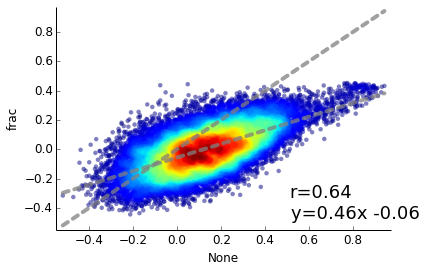

In [165]:
#Do not import
fig, ax = subplots()
plot_regression(pcna_corr, dx_rna.frac - .5, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)

In [166]:
m = pd.rolling_mean(dx_rna.frac.ix[pcna_corr.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(dx_rna.frac.ix[pcna_corr.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
f_win = (dx_rna.frac - m).dropna()
f_win.name = 'fraction overexpressed\n(detrended)'

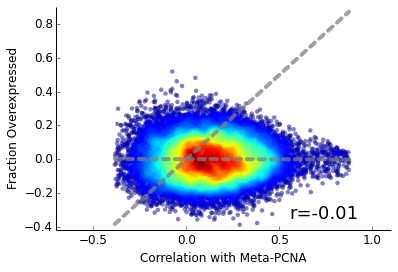

In [167]:
#Do not import
fig, ax = subplots()
plot_regression(pcna_corr, f_win, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)
ax.set_xbound(-.7,1.1)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ylabel('Fraction Overexpressed')
ax.set_xlabel('Correlation with Meta-PCNA')

In [168]:
m = pd.rolling_mean(pcna_corr.ix[dx_rna.frac.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(pcna_corr.ix[dx_rna.frac.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
pcna_win = (pcna_corr - m).dropna()
pcna_win.name = 'meta-PCNA\n(detrended)'

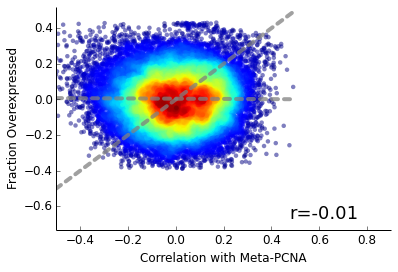

In [169]:
#Do not import
fig, ax = subplots()
plot_regression(pcna_win, dx_rna.frac - .5, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)
ax.set_xbound(-.5,.9)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ylabel('Fraction Overexpressed')
ax.set_xlabel('Correlation with Meta-PCNA')

In [170]:
gene_stats = pd.concat({'metaPCNA': pcna_corr,
                        'metaPCNA (detrended)': pcna_win,
                        'f_up': dx_rna.frac,
                        'f_up (detrended)': f_win})